### Read data

In [73]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns

# We also want to plot graphs and histograms
import matplotlib.pyplot as plt

dataCondition1 = pd.read_csv('conditionA.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataCondition1["condition"] = "Arrow"
dataCondition1



,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow
3,A03,506.00000,419.67993,6,3,3,89.560000,Yes,Arrow
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow
5,A06,405.36000,981.28000,9,4,3,18.559998,Yes,Arrow
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow
8,A12,706.28000,206.15997,3,4,1,-1.000000,Left aid,Arrow
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow


<Figure size 1600x800 with 0 Axes>

In [74]:
dataCondition2 = pd.read_csv('conditionB.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataCondition2["condition"] = "NPC"
dataCondition2

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,B00,352.03998,257.64008,3,4,1,15.720001,Yes,NPC
1,B01,464.32000,268.47998,2,3,3,77.880005,Yes,NPC
2,B03,353.68000,349.56000,6,2,1,0.040009,Yes,NPC
3,B04,336.40000,277.56003,1,1,3,4.839996,Yes,NPC
4,B05,493.96002,345.31995,6,2,7,90.439960,Yes,NPC
5,B06,926.88000,376.60010,5,2,15,328.679930,Yes,NPC
6,B07,748.92000,502.84003,5,3,19,188.639980,Yes,NPC
7,B09,316.08002,410.07996,5,3,0,0.000000,Yes,NPC
8,B10,572.76000,547.55994,6,3,3,132.040010,Yes,NPC
9,B12,315.52000,1318.36010,12,4,0,0.000000,Yes,NPC


In [75]:
surveyDataA = pd.read_csv('surveyA.csv', header=0, names = ['study completion time', 'consent', 'downloaded game', 'participant number', 'gender', 'age', 'favorite games', 'player archetype', 'completed game', 'technical issues', 'additional comments'])  #Reading data where the arrow was the navigational aid
surveyDataA

,study completion time,consent,downloaded game,participant number,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,A00,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil,Yes!,NaN,Fun little game - I low key wonder if there we...
1,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,A03,Female,22,"Portal, The last of us, League of legends",Mastermind,Yes!,NaN,NaN
2,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,A04,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind,Yes!,NaN,Cool game! Would've like to get me some of tho...
3,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,A06,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind,Yes!,NaN,NaN
4,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,A08,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
5,2020/11/27 5:43:37 PM GMT+2,Yes,Yes!,A05,Male,22,"Warhammer 40k Dawn of War, Stronghold, Battlef...",Seeker,Yes!,"Nothing special, I just saw once white line be...","Tale at beggining was fantastic, music as well..."
6,2020/11/27 6:30:06 PM GMT+2,Yes,Yes!,A07,Male,22,"Death Stranding, Red Dead Redemption 2, XCOM 2",Seeker,Yes!,got stuck for a second between a rock and a wa...,Enjoyed the game and the soundtrack
7,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,A01,Male,20,"GTA 5, NBA2k17, Among us",Achiever,Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
8,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,A11,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor,Yes!,Laggy movement,NaN
9,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,A13,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind,Yes!,No issues.,That was fun.


In [76]:
surveyDataB = pd.read_csv('surveyB.csv', header=0, names = ['study completion time', 'consent', 'downloaded game', 'participant number', 'gender', 'age', 'favorite games', 'player archetype', 'completed game', 'technical issues', 'additional comments'])  #Reading data where the arrow was the navigational aid
surveyDataB

,study completion time,consent,downloaded game,participant number,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,2020/11/27 2:50:52 PM GMT+2,Yes,Yes!,B00,Male,22,"World of Warcraft, League of Legends, Pokemon",Seeker,Yes!,NaN,The part I enjoyed the most was the soundtrack...
1,2020/11/27 3:52:51 PM GMT+2,Yes,Yes!,B05,Female,20,"Portal 2, To The Moon, Terraria",Mastermind,Yes!,No technical issues.,It's weird that you can jump on plants as a fu...
2,2020/11/27 4:50:30 PM GMT+2,Yes,Yes!,B08,Male,17,"League of legends, World of warcraft and Apex ...",Conqueror,Yes!,I did not any of that,"I loved the game, good job on that and good lu..."
3,2020/11/27 6:48:54 PM GMT+2,Yes,Yes!,B09,Male,22,"Fallout New Vegas, Mafia II, Mass Effect 2",Achiever,Yes!,"Had no technical issues, overall game ran very...","Overall, the bear controlled very smoothly the..."
4,2020/11/28 10:48:06 AM GMT+2,Yes,Yes!,B01,Male,26,"Bastion, Divinity Original Sin 2, Hollow Knight",Seeker,Yes!,NaN,On getting the text file to send back I accide...
5,2020/11/28 2:49:01 PM GMT+2,Yes,Yes!,B04,Male,20,-Rocket League\n-Life is Strange\n-The last of us,Seeker,Yes!,"No major ones, only thing I noticed was that t...",Actually a beautiful game! Had fun exploring a...
6,2020/11/28 3:54:46 PM GMT+2,Yes,Yes!,B12,Male,22,"Fallout 1&2, Far Cry 2, Red Dead Redemption 2",Conqueror,Yes!,NaN,The bees were too large. You had to be feeding...
7,2020/11/28 7:09:37 PM GMT+2,Yes,Yes!,B14,Male,22,"Warcraft 3, Borderlands 2, Stronghold Crusader",Mastermind,Yes!,frame rate and unresponsive movement controls ...,very cute
8,2020/11/28 7:16:54 PM GMT+2,Yes,Yes!,B17,Male,24,"Kingdom hearts 2, Fairy tail, League of Legends",Seeker,Yes!,"Didn't had any trouble, no lag runned smoothly",Longest chase in my life could have made it sh...
9,2020/11/28 7:50:18 PM GMT+2,Yes,Yes!,B07,Male,23,"Fallout 4, World war Z, This war of Mine",Socialiser,Yes!,NaN,i got lost alot


In [77]:
dataA = pd.merge(dataCondition1, surveyDataA, on='participant number')
dataA

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil,Yes!,NaN,Fun little game - I low key wonder if there we...
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,Male,20,"GTA 5, NBA2k17, Among us",Achiever,Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow,2020/12/01 3:23:01 PM GMT+2,Yes,Yes!,Male,22,"Age of Empires III, Kona, Battle Brothers",Seeker,Yes!,Slight FPS drop in a cave,NaN
3,A03,506.00000,419.67993,6,3,3,89.560000,Yes,Arrow,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,Female,22,"Portal, The last of us, League of legends",Mastermind,Yes!,NaN,NaN
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind,Yes!,NaN,Cool game! Would've like to get me some of tho...
5,A06,405.36000,981.28000,9,4,3,18.559998,Yes,Arrow,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind,Yes!,NaN,NaN
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor,Yes!,Laggy movement,NaN
8,A12,706.28000,206.15997,3,4,1,-1.000000,Left aid,Arrow,2020/11/30 6:46:12 PM GMT+2,Yes,Yes!,Male,23,"Fallout 4, DnD, Darkest Dungeon",Seeker,Yes!,NaN,Love the music
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind,Yes!,No issues.,That was fun.


In [78]:
dataB = pd.merge(dataCondition2, surveyDataB, on='participant number')
dataB

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,B00,352.03998,257.64008,3,4,1,15.720001,Yes,NPC,2020/11/27 2:50:52 PM GMT+2,Yes,Yes!,Male,22,"World of Warcraft, League of Legends, Pokemon",Seeker,Yes!,NaN,The part I enjoyed the most was the soundtrack...
1,B01,464.32000,268.47998,2,3,3,77.880005,Yes,NPC,2020/11/28 10:48:06 AM GMT+2,Yes,Yes!,Male,26,"Bastion, Divinity Original Sin 2, Hollow Knight",Seeker,Yes!,NaN,On getting the text file to send back I accide...
2,B03,353.68000,349.56000,6,2,1,0.040009,Yes,NPC,2020/12/01 12:17:35 PM GMT+2,Yes,Yes!,Female,22,"Legend of Zelda, Pokemon, Mario Kart",Seeker,Yes!,"I was stuck in dead end, with the bees behind ...","It was a long road, and I it got the tiniest b..."
3,B04,336.40000,277.56003,1,1,3,4.839996,Yes,NPC,2020/11/28 2:49:01 PM GMT+2,Yes,Yes!,Male,20,-Rocket League\n-Life is Strange\n-The last of us,Seeker,Yes!,"No major ones, only thing I noticed was that t...",Actually a beautiful game! Had fun exploring a...
4,B05,493.96002,345.31995,6,2,7,90.439960,Yes,NPC,2020/11/27 3:52:51 PM GMT+2,Yes,Yes!,Female,20,"Portal 2, To The Moon, Terraria",Mastermind,Yes!,No technical issues.,It's weird that you can jump on plants as a fu...
5,B06,926.88000,376.60010,5,2,15,328.679930,Yes,NPC,2020/11/30 7:04:11 PM GMT+2,Yes,Yes!,Male,25,"Overwatch, Spider man (ps4),Borderlands 2.",Mastermind,Yes!,NaN,Everything looks amazing makes feel like you a...
6,B07,748.92000,502.84003,5,3,19,188.639980,Yes,NPC,2020/11/28 7:50:18 PM GMT+2,Yes,Yes!,Male,23,"Fallout 4, World war Z, This war of Mine",Socialiser,Yes!,NaN,i got lost alot
7,B09,316.08002,410.07996,5,3,0,0.000000,Yes,NPC,2020/11/27 6:48:54 PM GMT+2,Yes,Yes!,Male,22,"Fallout New Vegas, Mafia II, Mass Effect 2",Achiever,Yes!,"Had no technical issues, overall game ran very...","Overall, the bear controlled very smoothly the..."
8,B10,572.76000,547.55994,6,3,3,132.040010,Yes,NPC,2020/12/01 1:11:54 AM GMT+2,Yes,Yes!,Female,28,"Echo, Oxenfree, Divinity Original Sin 2",Seeker,Yes!,I have stuck between the plants and the bees c...,NaN
9,B12,315.52000,1318.36010,12,4,0,0.000000,Yes,NPC,2020/11/28 3:54:46 PM GMT+2,Yes,Yes!,Male,22,"Fallout 1&2, Far Cry 2, Red Dead Redemption 2",Conqueror,Yes!,NaN,The bees were too large. You had to be feeding...


In [79]:
data = pd.concat([dataA, dataB]).reset_index(drop = True)
data.head(60)

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil,Yes!,NaN,Fun little game - I low key wonder if there we...
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,Male,20,"GTA 5, NBA2k17, Among us",Achiever,Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow,2020/12/01 3:23:01 PM GMT+2,Yes,Yes!,Male,22,"Age of Empires III, Kona, Battle Brothers",Seeker,Yes!,Slight FPS drop in a cave,NaN
3,A03,506.00000,419.67993,6,3,3,89.560000,Yes,Arrow,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,Female,22,"Portal, The last of us, League of legends",Mastermind,Yes!,NaN,NaN
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind,Yes!,NaN,Cool game! Would've like to get me some of tho...
5,A06,405.36000,981.28000,9,4,3,18.559998,Yes,Arrow,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind,Yes!,NaN,NaN
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor,Yes!,Laggy movement,NaN
8,A12,706.28000,206.15997,3,4,1,-1.000000,Left aid,Arrow,2020/11/30 6:46:12 PM GMT+2,Yes,Yes!,Male,23,"Fallout 4, DnD, Darkest Dungeon",Seeker,Yes!,NaN,Love the music
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind,Yes!,No issues.,That was fun.


### Looking at the data

In [80]:
dataA.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,438.630526,418.957903,5.131579,2.736842,2.736842,37.849469,24.026316
std,128.434672,170.112659,1.961398,1.107327,3.469436,74.254988,4.016768
min,302.400000,206.159970,1.000000,0.000000,0.000000,-1.000000,20.000000
25%,357.060030,310.239995,4.000000,2.000000,1.000000,0.000000,21.250000
50%,395.280000,379.660035,5.000000,3.000000,1.000000,6.860001,23.000000
75%,496.370027,536.070045,6.000000,4.000000,3.000000,43.139996,25.000000
max,837.000000,981.280000,9.000000,4.000000,15.000000,376.039920,36.000000


In [81]:
dataB.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,419.066666,404.813339,4.589744,2.615385,3.025641,50.049223,24.769231
std,148.702980,196.446839,2.209048,1.138221,4.809460,98.010891,3.786830
min,284.680000,191.239990,0.000000,0.000000,0.000000,-1.000000,20.000000
25%,317.500000,297.580000,3.000000,2.000000,0.000000,0.000000,22.000000
50%,366.040000,352.520020,5.000000,3.000000,1.000000,0.040009,23.000000
75%,456.760000,452.560000,6.000000,4.000000,3.000000,46.919996,27.500000
max,926.880000,1318.360100,12.000000,4.000000,19.000000,419.799960,35.000000


In [82]:
data.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,428.721558,411.793773,4.857143,2.675325,2.883117,44.028565,24.402597
std,138.505970,182.851683,2.094569,1.117346,4.176923,86.747396,3.894192
min,284.680000,191.239990,0.000000,0.000000,0.000000,-1.000000,20.000000
25%,336.400000,304.600000,4.000000,2.000000,0.000000,0.000000,22.000000
50%,377.800000,370.479980,5.000000,3.000000,1.000000,3.440002,23.000000
75%,479.120000,475.559970,6.000000,4.000000,3.000000,44.400000,26.000000
max,926.880000,1318.360100,12.000000,4.000000,19.000000,419.799960,36.000000


In [83]:
dataA.corr()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
time going forward,1.000000,-0.257533,-0.079173,0.015079,0.644008,0.742088,-0.084050
time going back,-0.257533,1.000000,0.720815,0.413610,-0.284682,-0.278554,0.045409
mistakes made,-0.079173,0.720815,1.000000,0.178144,-0.133783,-0.070154,0.140199
shortcuts taken,0.015079,0.413610,0.178144,1.000000,-0.159213,-0.049813,-0.162463
times wandered away from navigational aid,0.644008,-0.284682,-0.133783,-0.159213,1.000000,0.734110,-0.016944
time spent away from navigational aid,0.742088,-0.278554,-0.070154,-0.049813,0.734110,1.000000,-0.030929
age,-0.084050,0.045409,0.140199,-0.162463,-0.016944,-0.030929,1.000000


In [84]:
dataB.corr()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
time going forward,1.000000,-0.078623,-0.099858,0.124171,0.766493,0.627858,-0.026608
time going back,-0.078623,1.000000,0.805044,0.310357,-0.095321,-0.045309,-0.083396
mistakes made,-0.099858,0.805044,1.000000,0.050720,-0.018799,-0.019108,-0.162615
shortcuts taken,0.124171,0.310357,0.050720,1.000000,-0.007766,-0.001260,-0.106610
times wandered away from navigational aid,0.766493,-0.095321,-0.018799,-0.007766,1.000000,0.625769,-0.030010
time spent away from navigational aid,0.627858,-0.045309,-0.019108,-0.001260,0.625769,1.000000,0.261364
age,-0.026608,-0.083396,-0.162615,-0.106610,-0.030010,0.261364,1.000000


In [85]:
data.corr()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
time going forward,1.000000,-0.150738,-0.080751,0.078536,0.712787,0.662538,-0.059852
time going back,-0.150738,1.000000,0.766871,0.357615,-0.167412,-0.138249,-0.026086
mistakes made,-0.080751,0.766871,1.000000,0.114853,-0.066604,-0.047975,-0.029958
shortcuts taken,0.078536,0.357615,0.114853,1.000000,-0.070263,-0.025169,-0.138908
times wandered away from navigational aid,0.712787,-0.167412,-0.066604,-0.070263,1.000000,0.663616,-0.020528
time spent away from navigational aid,0.662538,-0.138249,-0.047975,-0.025169,0.663616,1.000000,0.137079
age,-0.059852,-0.026086,-0.029958,-0.138908,-0.020528,0.137079,1.000000


### Demographic data

Males: 65
Females: 12


Text(0, 0.5, 'Number of participants')

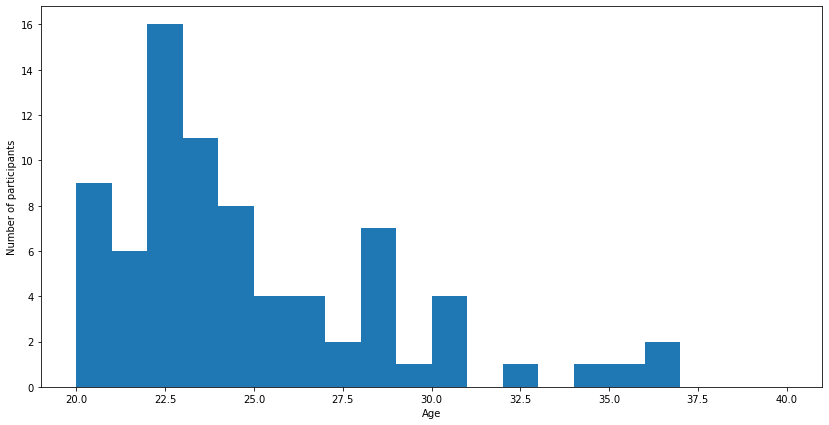

In [96]:
#Gender
dataMale = data.loc[(data["gender"] == "Male"), "completed game"]
dataFemale = data.loc[(data["gender"] == "Female"), "completed game"]
print("Males: " + str(dataMale.count()))  # condition of males
print("Females: " + str(dataFemale.count()))# count of females

#age
plt.figure(figsize=(14,7))
plt.hist(data["age"], bins = 20, range = (20,40))
plt.xlabel("Age")
plt.ylabel("Number of participants")


Archetypes

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

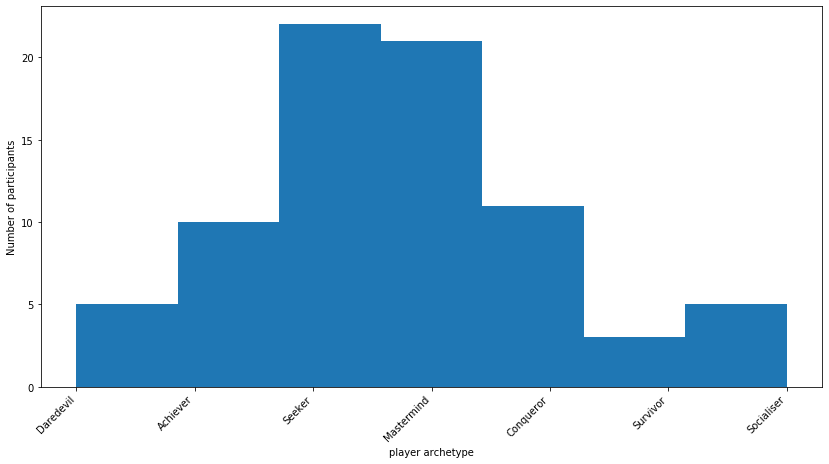

In [101]:
#age
plt.figure(figsize=(14,7))
plt.hist(data["player archetype"], bins = 7)
plt.xlabel("Player archetype")
plt.ylabel("Number of participants")
plt.xticks(rotation='45', ha="right")

### Test data

Time going forward

Text(0, 0.5, 'Number of participants')

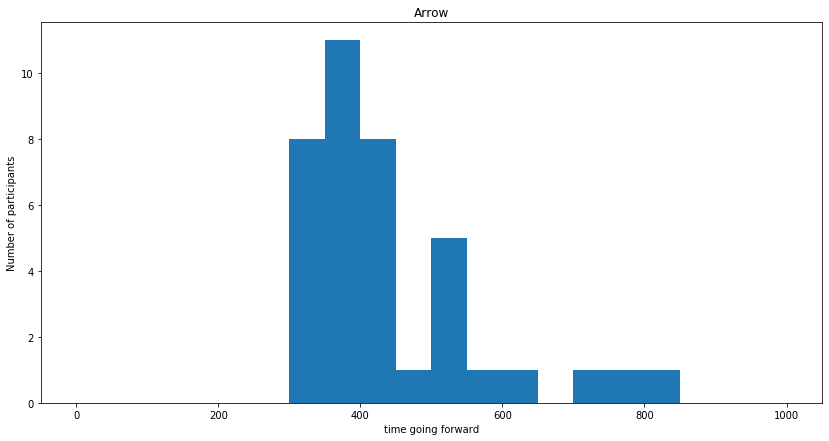

In [104]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "Arrow", 'time going forward'], bins = 20, range = (0,1000))
plt.title("Arrow")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")

Text(0, 0.5, 'Number of participants')

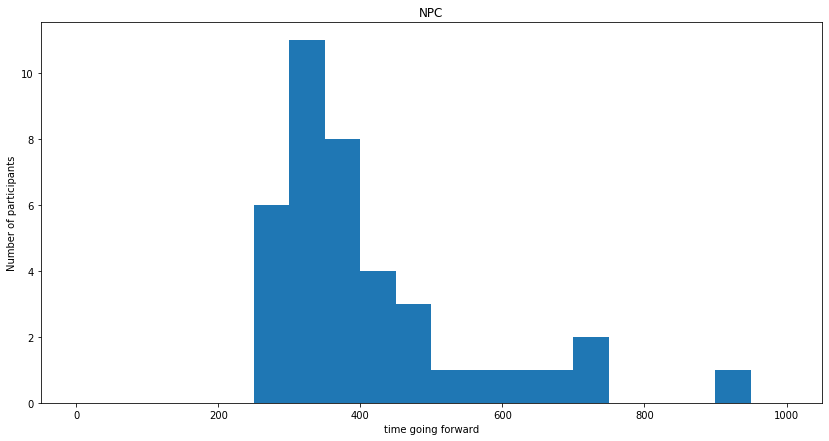

In [105]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "NPC", 'time going forward'], bins = 20, range = (0,1000))
plt.title("NPC")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")

Time going back

Text(0, 0.5, 'Number of participants')

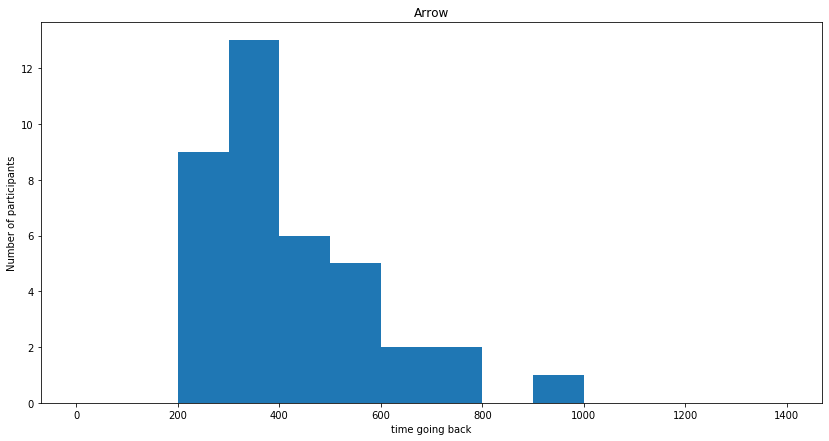

In [107]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "Arrow", 'time going back'], bins = 14, range = (0,1400))
plt.title("Arrow")
plt.xlabel("time going back")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

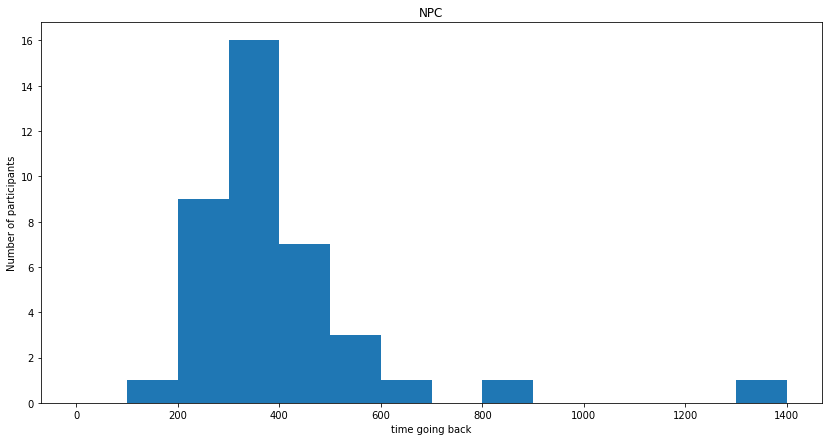

In [108]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "NPC", 'time going back'], bins = 14, range = (0,1400))
plt.title("NPC")
plt.xlabel("time going back")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

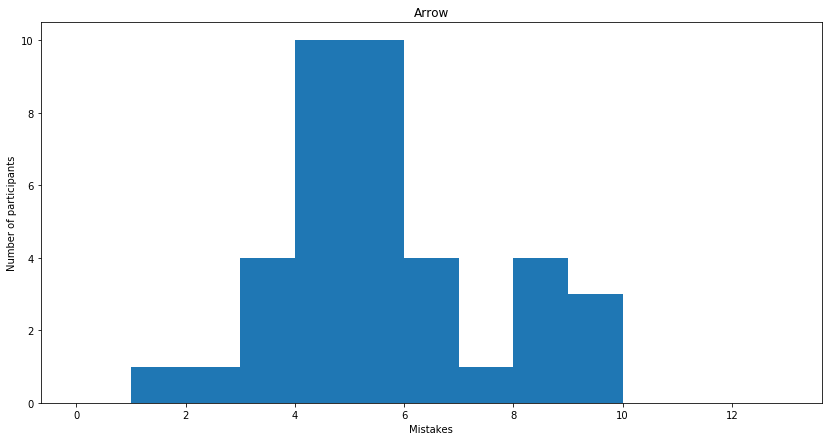

In [112]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "Arrow", 'mistakes made'], bins = 13, range = (0,13))
plt.title("Arrow")
plt.xlabel("Mistakes")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

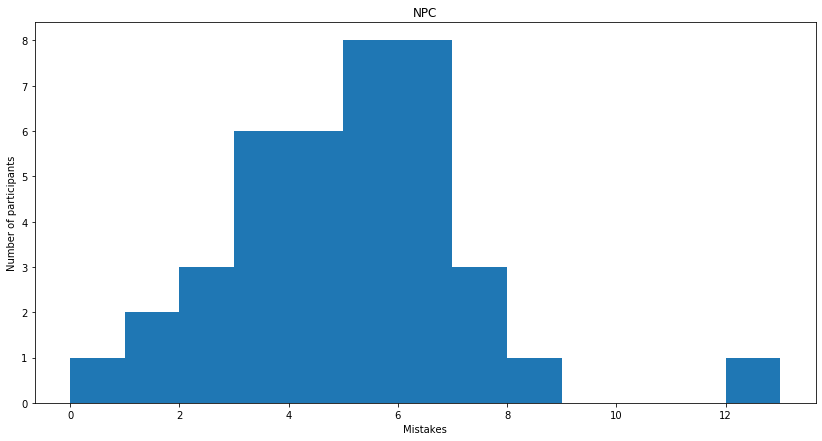

In [113]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "NPC", 'mistakes made'], bins = 13, range = (0,13))
plt.title("NPC")
plt.xlabel("Mistakes")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

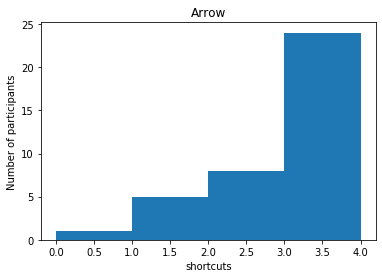

In [25]:
plt.hist(data.loc[data["condition"] == "Arrow", 'shortcuts taken'], bins = 4, range = (0,4))
plt.title("Arrow")
plt.xlabel("shortcuts")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

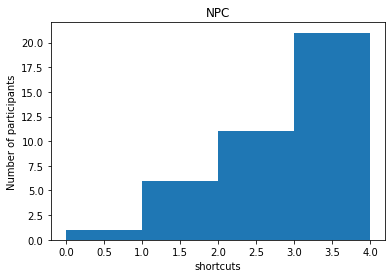

In [26]:
plt.hist(data.loc[data["condition"] == "NPC", 'shortcuts taken'], bins = 4, range = (0,4))
plt.title("NPC")
plt.xlabel("shortcuts")
plt.ylabel("Number of participants")

Text(0, 0.5, 'Number of participants')

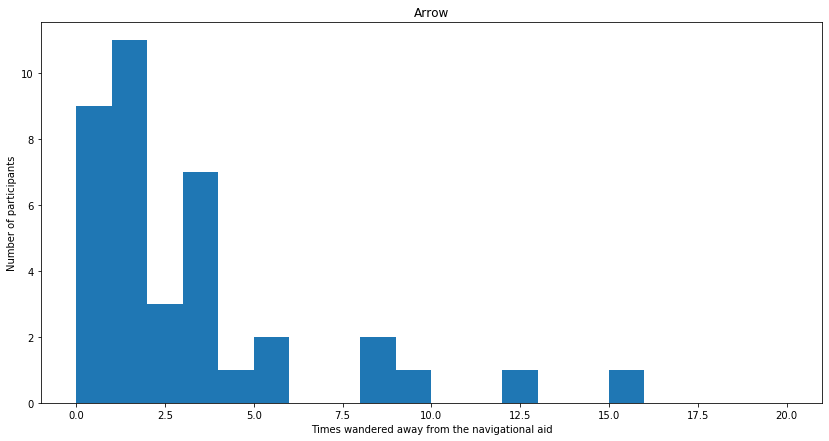

In [119]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "Arrow", 'times wandered away from navigational aid'], bins = 20, range = (0,20))
plt.title("Arrow")
plt.xlabel("Times wandered away from the navigational aid")
plt.ylabel("Number of participants")

Text(0, 0.5, 'Number of participants')

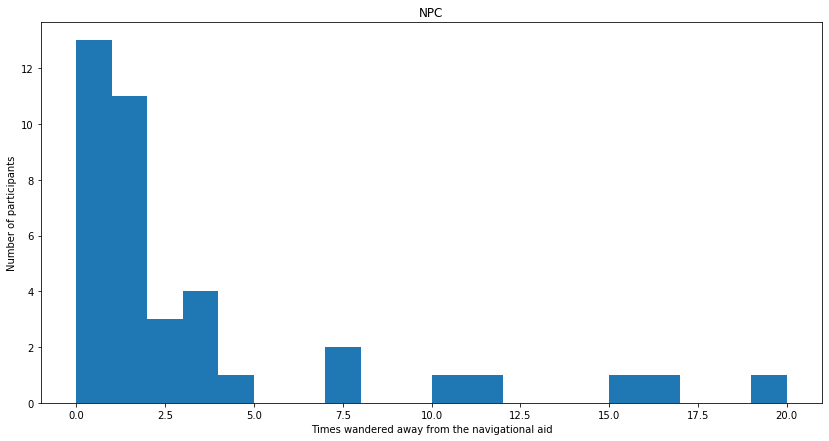

In [125]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "NPC", 'times wandered away from navigational aid'], bins = 20, range = (0,20))
plt.title("NPC")
plt.xlabel("Times wandered away from the navigational aid")
plt.ylabel("Number of participants")

Text(0, 0.5, 'Number of participants')

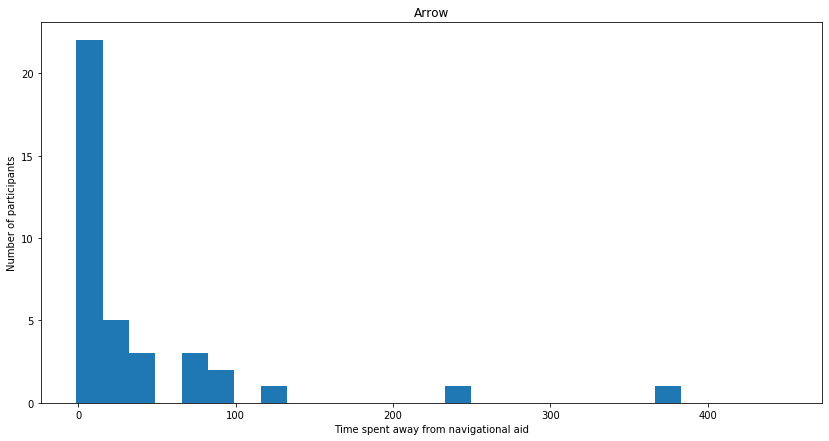

In [134]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "Arrow", 'time spent away from navigational aid'], bins = 27, range = (-1, 450))
plt.title("Arrow")
plt.xlabel("Time spent away from navigational aid")
plt.ylabel("Number of participants")

Text(0, 0.5, 'Number of participants')

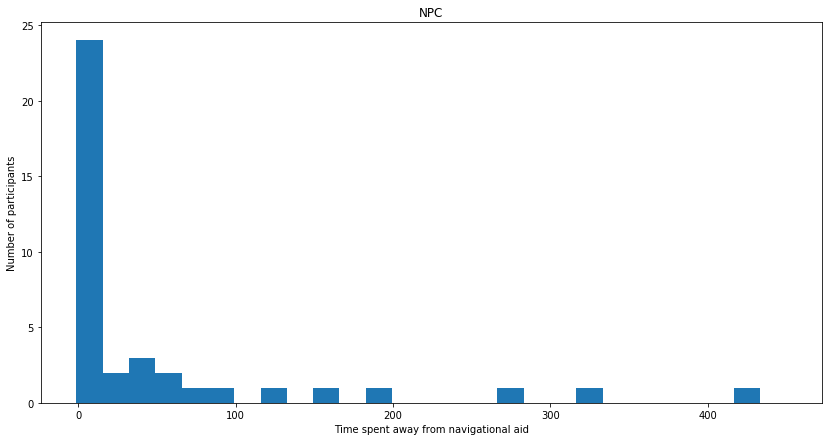

In [133]:
plt.figure(figsize=(14,7))
plt.hist(data.loc[data["condition"] == "NPC", 'time spent away from navigational aid'], bins = 27, range = (-1, 450))
plt.title("NPC")
plt.xlabel("Time spent away from navigational aid")
plt.ylabel("Number of participants")

### Comparing Seeker and non-seeker data

In [53]:
seeker = data.loc[data["player archetype"] == "Seeker"]
nonSeeker = data.loc[data["player archetype"] != "Seeker"]


,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil,Yes!,NaN,Fun little game - I low key wonder if there we...
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,Male,20,"GTA 5, NBA2k17, Among us",Achiever,Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
3,A03,506.00000,419.67993,6,3,3,89.560000,Yes,Arrow,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,Female,22,"Portal, The last of us, League of legends",Mastermind,Yes!,NaN,NaN
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind,Yes!,NaN,Cool game! Would've like to get me some of tho...
5,A06,405.36000,981.28000,9,4,3,18.559998,Yes,Arrow,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind,Yes!,NaN,NaN
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor,Yes!,Laggy movement,NaN
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind,Yes!,No issues.,That was fun.
12,A20,412.84000,563.07996,6,4,2,15.359955,Yes,Arrow,2020/12/04 10:44:15 PM GMT+2,Yes,Yes!,Male,23,"Cs 1.6, Nfs",Daredevil,Yes!,Skipped some frames here and there,NaN
13,A21,332.36000,548.44006,5,3,1,0.079987,Yes,Arrow,2020/11/29 3:09:07 PM GMT+2,Yes,Yes!,Male,20,"Europa Universalis 4, League Of Legends, Crusa...",Mastermind,Yes!,Lag in the cave. Small skybox bugs.,Annoying controls


Text(0, 0.5, 'Number of participants')

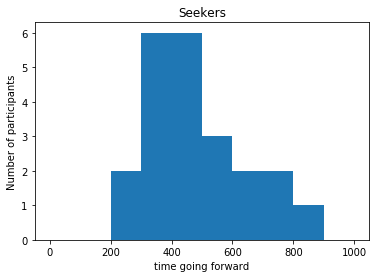

In [51]:
plt.hist(seeker['time going forward'], bins = 10, range = (0,1000))
plt.title("Seekers")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

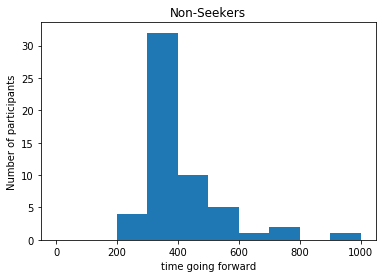

In [52]:
plt.hist(nonSeeker['time going forward'], bins = 10, range = (0,1000))
plt.title("Non-Seekers")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")

### Descriptive Statistics

In [27]:
arrowMean = data.loc[data["condition"] == "Arrow", 'time going back'].mean()
npcMean = data.loc[data["condition"] == "NPC", 'time going back'].mean()

arrowStd = data.loc[data["condition"] == "Arrow", 'time going back'].std()
npcStd = data.loc[data["condition"] == "NPC", 'time going back'].std()
print(arrowMean)
print(npcMean)
print(arrowStd)
print(npcStd)


418.957902631579
404.8133392307692
170.11265861347292
196.44683919787812


Find effect size using Cohens d

In [28]:
from numpy import std, mean, sqrt

#correct if the population S.D. is expected to be equal for the two groups.
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

x = data.loc[data["condition"] == "Arrow", 'time going back']
y = data.loc[data["condition"] == "NPC", 'time going back']
#print(x)

#correct only if nx=ny
d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)
print ("d by the 1st method = " + str(d))
if (len(x) != len(y)):
    print("The first method is incorrect because nx is not equal to ny.")

#correct for more general case including nx !=ny
print ("d by the more general 2nd method = " + str(cohen_d(x,y)))

d by the 1st method = 0.07697633107439023
The first method is incorrect because nx is not equal to ny.
d by the more general 2nd method = 0.07690307978071997


If the data is parametric we use independant t-test: ttest_ind

If it is not parametric :( we use: mannwhitneyu

### Preconditions for t-test: is the data parametric?


In [29]:
import numpy
arrowTime = data.loc[data["condition"] == "Arrow", 'time going back']
arrowTime = numpy.log(arrowTime)
stats.shapiro(arrowTime)

(0.9748081564903259, 0.5364501476287842)

In [30]:
npcTime = data.loc[data["condition"] == "NPC", 'time going back']
npcTime = numpy.log(npcTime)
stats.shapiro(npcTime)

(0.9173105359077454, 0.007189383264631033)

In [31]:
arrowTime = data.loc[data["condition"] == "Arrow", 'mistakes made']
stats.shapiro(arrowTime)

(0.9273658990859985, 0.016585014760494232)

In [32]:
npcTime = data.loc[data["condition"] == "NPC", 'mistakes made']
stats.shapiro(npcTime)

(0.9435592293739319, 0.04996420070528984)

In [33]:
arrowTime = data.loc[data["condition"] == "Arrow", 'time going back']
npcTime = data.loc[data["condition"] == "NPC", 'time going back']

stats.levene(arrowTime, npcTime)

LeveneResult(statistic=0.18135143945539442, pvalue=0.6714340222275595)

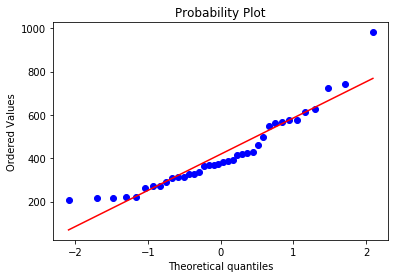

In [34]:
stats.probplot(arrowTime, plot = plt)
plt.show()

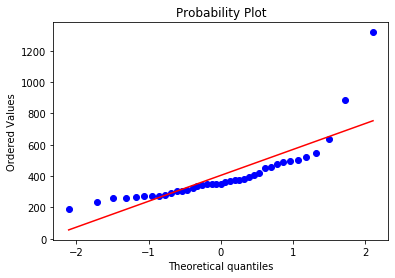

In [35]:
stats.probplot(npcTime, plot = plt)
plt.show()

### Comparing time going back

In [36]:
arrowTime = data.loc[data["condition"] == "Arrow", 'time going back']
npcTime = data.loc[data["condition"] == "NPC", 'time going back']
stats.ttest_ind(arrowTime, npcTime)

Ttest_indResult(statistic=0.3373824376949503, pvalue=0.7367710285191662)

### Comparing time going forward

In [44]:
arrowTime = data.loc[data["condition"] == "Arrow", 'time going forward']
npcTime = data.loc[data["condition"] == "NPC", 'time going forward']
stats.ttest_ind(arrowTime, npcTime)

Ttest_indResult(statistic=0.6171469132215112, pvalue=0.5390069605916492)

### Comparing mistakes made

In [37]:
arrowMistakes = data.loc[data["condition"] == "Arrow", 'mistakes made']
npcMistakes = data.loc[data["condition"] == "NPC", 'mistakes made']
stats.ttest_ind(arrowMistakes, npcMistakes)

Ttest_indResult(statistic=1.1370689759148231, pvalue=0.2591293025406745)

### Comparing mistakes made - non parametric test

In [38]:
arrowTime = data.loc[data["condition"] == "Arrow", 'time going back']
npcTime = data.loc[data["condition"] == "NPC", 'time going back']
stats.mannwhitneyu(arrowTime, npcTime)

MannwhitneyuResult(statistic=672.0, pvalue=0.24261009436654735)

In [39]:
arrowMistakes = data.loc[data["condition"] == "Arrow", 'mistakes made']
npcMistakes = data.loc[data["condition"] == "NPC", 'mistakes made']
stats.mannwhitneyu(arrowMistakes, npcMistakes)

MannwhitneyuResult(statistic=650.0, pvalue=0.17479676294704832)

### Boxplot

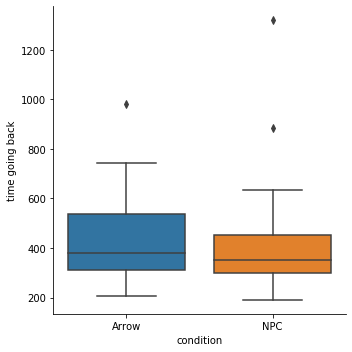

In [40]:
sns.catplot(x = 'condition', y = "time going back", kind = "box", data = data)

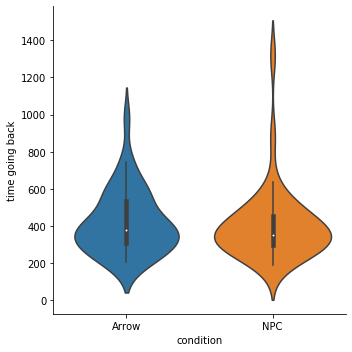

In [41]:
sns.catplot(x = 'condition', y = "time going back", kind = "violin", data = data)

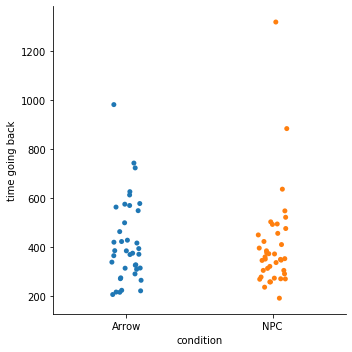

In [42]:
sns.catplot(x = 'condition', y = "time going back", kind = "strip", data = data)

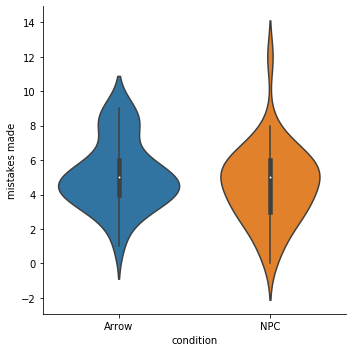

In [43]:
sns.catplot(x = 'condition', y = "mistakes made", kind = "violin", data = data)